Clear project data

Include  packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #scikit-learn


Load data

In [7]:
data = pd.read_csv('./data/student_payment_bi_export_20251005_215433.csv')

Show data

In [8]:
data.head()

,name,last_name,type_document_id,document_id,email,phone,student_state,headquarter_name,amount_1_1,amount_1_10,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
0,Melania,Abascal,TI,10965138,amaya01@example.com,3359154708,active,Sede Centro,192480.47,105899.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,active,NaN,NaN
1,Brunilda,Sanabria,TI,13176186,telmoespanol@example.com,+57 325 436 5564,active,Sede Albacete,170952.60,256132.30,...,REC-376218,REC-957987,REC-402252,REC-724284,REC-901996,REC-125853,REC-452088,expired,active,active
2,Josep,Benet,CE,15134794,dcabanas@example.net,3380526202,active,Sede Navarra,291224.69,61635.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expired,expired,NaN
3,Lourdes,Dalmau,CE,16095815,ncastell@example.net,+57 338 156 1125,active,Sede Ourense,60234.38,182733.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,active,active,NaN
4,Nicolasa,Sobrino,CC,16788532,marisol79@example.net,+57 315 228 4362,active,Sede Ourense,196992.44,111907.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,active,expired,NaN


Verify structure

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 131 entries, name to state_3
dtypes: float64(30), int64(1), object(100)
memory usage: 82.0+ KB


Stadistics

In [10]:
data.describe()

,document_id,amount_1_1,amount_1_10,amount_1_2,amount_1_3,amount_1_4,amount_1_5,amount_1_6,amount_1_7,amount_1_8,...,amount_3_1,amount_3_10,amount_3_2,amount_3_3,amount_3_4,amount_3_5,amount_3_6,amount_3_7,amount_3_8,amount_3_9
count,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,5.839253e+07,160249.734875,170942.741500,183994.307750,178664.558875,155341.455500,174844.378125,169764.073250,186820.747750,194450.381125,...,182580.780000,138544.212400,172416.940800,195869.47920,191885.049200,162790.706800,153008.621200,193442.093200,175936.906000,159624.910800
std,2.449499e+07,78693.441843,71806.611881,68592.324281,71414.958068,69789.064441,78546.952135,65853.978647,69365.083899,75356.281560,...,83936.505694,72717.089043,79483.456668,53071.68374,83035.604686,75591.005266,71331.011772,73639.306845,77951.915745,77714.841599
min,1.096514e+07,50383.990000,50741.450000,51123.690000,59154.880000,52340.160000,54247.140000,57444.700000,50949.100000,52053.980000,...,60450.130000,53262.060000,55735.240000,94019.36000,60255.070000,60976.210000,62281.620000,52600.270000,63298.680000,56327.900000
25%,4.146164e+07,91783.237500,104621.317500,131860.495000,116930.205000,95763.067500,100577.440000,120390.452500,125020.172500,127999.287500,...,104000.930000,90570.000000,98982.430000,174691.33000,115352.760000,94328.650000,91304.720000,147342.800000,95154.270000,89432.900000
50%,5.924103e+07,140473.925000,171348.550000,186177.370000,192390.925000,141446.695000,168739.250000,170080.275000,199349.405000,208849.365000,...,195360.490000,122581.450000,164009.920000,201116.79000,199275.840000,154868.120000,137337.850000,191418.220000,185459.960000,140650.960000
75%,7.715494e+07,227570.955000,229601.560000,239201.075000,237375.430000,210591.612500,247591.160000,228166.170000,247154.372500,265648.792500,...,258117.310000,184275.260000,238320.690000,226778.61000,262955.330000,226407.290000,208077.480000,256521.080000,233646.540000,222648.890000
max,9.991341e+07,299325.790000,293627.800000,293657.240000,298963.890000,297851.320000,297321.760000,297565.890000,298647.980000,296361.010000,...,295995.210000,291514.980000,298972.250000,288597.29000,298686.290000,297503.440000,275775.890000,299822.730000,292347.580000,297849.710000


Get objects

In [11]:
data.describe(include=['O'])

,name,last_name,type_document_id,email,phone,student_state,headquarter_name,concept_1_1,concept_1_10,concept_1_2,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
count,80,80,80,80,80,80,80,80,80,80,...,25,25,25,25,25,25,25,80,54,25
unique,77,79,4,80,80,3,10,10,10,10,...,25,25,25,25,25,25,25,3,3,3
top,Abraham,Torralba,CC,amaya01@example.com,3359154708,active,Sede Centro,Recargo por mora,Descuento hermanos,Recargo por mora,...,REC-376218,REC-957987,REC-402252,REC-724284,REC-901996,REC-125853,REC-452088,active,active,active
freq,2,2,22,1,1,71,12,14,13,12,...,1,1,1,1,1,1,1,53,38,21


In [12]:
data.describe(include=['object'])

,name,last_name,type_document_id,email,phone,student_state,headquarter_name,concept_1_1,concept_1_10,concept_1_2,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
count,80,80,80,80,80,80,80,80,80,80,...,25,25,25,25,25,25,25,80,54,25
unique,77,79,4,80,80,3,10,10,10,10,...,25,25,25,25,25,25,25,3,3,3
top,Abraham,Torralba,CC,amaya01@example.com,3359154708,active,Sede Centro,Recargo por mora,Descuento hermanos,Recargo por mora,...,REC-376218,REC-957987,REC-402252,REC-724284,REC-901996,REC-125853,REC-452088,active,active,active
freq,2,2,22,1,1,71,12,14,13,12,...,1,1,1,1,1,1,1,53,38,21


visualise size dataset

In [13]:
data.shape

(80, 131)

In [ ]:
# I'M WORKING HERE
# Convert Pclass to category(kind string), more efficient to best performance
data['Pclass'] = data['Pclass'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Finding Outliers - Using graphics

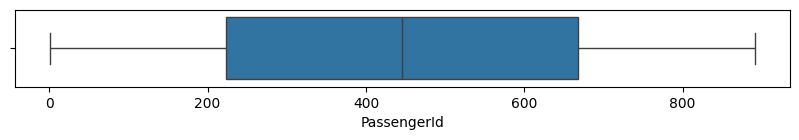

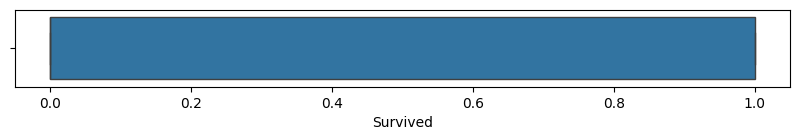

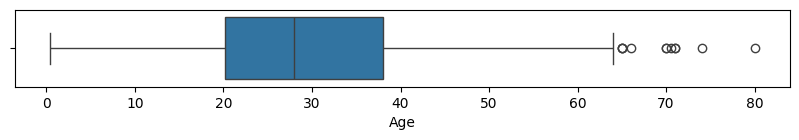

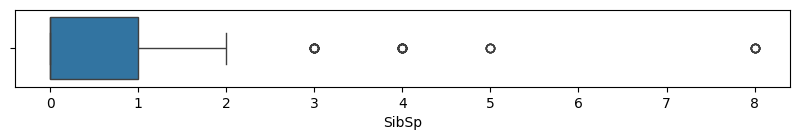

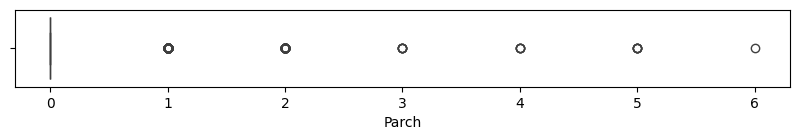

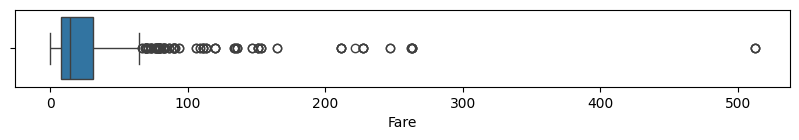

In [22]:
# number are including all the columns with numeric data
cols = data.select_dtypes(include=['number']).columns

for column in cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=data[cols], x=column)


Outliers - Calc

IRQ = rango interquartilico

----Q1(25%)----Q2(50%)----Q3(75%)----

In [27]:
outliers = {}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  # Take Q2 && Q3
  IRQ = Q3 - Q1
  # Calculate the limits
  lower_limit = Q1 - 1.5 * IRQ
  upper_limit = Q3 + 1.5 * IRQ
  # Find outliers
  outliers[col] = data[col][(data[col] < lower_limit) | (data[col] > upper_limit)]
  print(f'{col}: {len(outliers[col])
  }')



PassengerId: 0
Survived: 0
Age: 0
SibSp: 46
Parch: 213
Fare: 116


Desviación standar

In [28]:
# Desviación standar
outliers2 = {}

for col in cols:
  mean = data[col].mean()
  std = data[col].std()
  # Calculate the limits
  lower_limit = mean - 3 * std
  upper_limit = mean + 3 * std
  # Find outliers
  outliers2[col] = data[col][(data[col] < lower_limit) | (data[col] > upper_limit)]
  print(f'{col}: {len(outliers2[col])}')







PassengerId: 0
Survived: 0
Age: 2
SibSp: 30
Parch: 15
Fare: 20


<Axes: xlabel='Fare', ylabel='Count'>

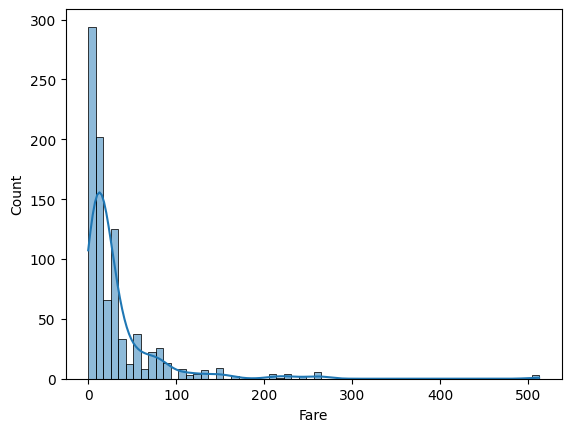

In [8]:
sns.histplot(data=data, x='Fare', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

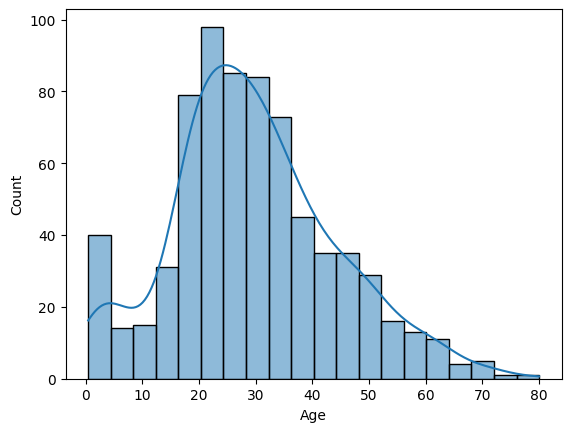

In [9]:
sns.histplot(data=data, x='Age', kde=True)

Validate null values with .isna()

In [10]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Count null values

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Delete null values

In [12]:
# inplace=True to modify the original dataframe
# inplace=False to create a new dataframe
# example:
# data_new = data.drop('Cabin', axis=1, inplace=False)

# axis=1 to drop the column
# axis=0 to drop the row
data.drop('Cabin', axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Impute data

In [23]:
impute = SimpleImputer(strategy='median')

print('Initial median: ', data['Age'].median())

output = impute.fit_transform(data[['Age']])
output = pd.DataFrame(output)

print('\nNull into new dataframe: ', output.isna().sum())
print('\nMedian for new dataframe: ', output.median())

Initial median:  28.0

Null into new dataframe:  0    0
dtype: int64

Median for new dataframe:  0    28.0
dtype: float64


In [27]:
impute = SimpleImputer(strategy='constant', fill_value='S')

print('Initial median: ', data['Embarked'].value_counts())

output = impute.fit_transform(data[['Embarked']])
output = pd.DataFrame(output)

print('\nNull into new dataframe: ', output.isna().sum())
print('\nMedian for new dataframe: ', output.value_counts())

Initial median:  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Null into new dataframe:  0    0
dtype: int64

Median for new dataframe:  0
S    646
C    168
Q     77
Name: count, dtype: int64
